$$\Large \color{blue}{\textbf{The Role of Pipelines}}$$

$$\small \color{green}{\textbf{Written and Coded by}}$$
$$\large \color{green}{\textbf{Phuong Van Nguyen}}$$
$$\small \color{red}{\textbf{ phuong.nguyen@summer.barcelonagse.eu}}$$

# Preparing project


## Loading Lib

In [1]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.2.post1.


In [2]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.0.3


In [3]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [4]:
import os
import itertools
import math

import mglearn
import scipy.interpolate
import scipy.integrate
from timeit import default_timer as timer
import numpy as np
import pandas as pd
from patsy import dmatrices
from scipy import stats
from pandas import set_option
from pandas.plotting import scatter_matrix
from timeit import default_timer as timer
from sklearn.preprocessing import label_binarize
from math import log2
from scipy.stats import sem

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import preprocessing
#from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [5]:
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import (brier_score_loss, precision_score, recall_score)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [7]:
from pickle import dump
from pickle import load
Purple= '\033[95m'
Cyan= '\033[96m'
Darkcyan= '\033[36m'
Blue = '\033[94m'
Green = '\033[92m'
Yellow = '\033[93m'
Red = '\033[91m'
Bold = "\033[1m"
Reset = "\033[0;0m"
Underline= '\033[4m'
End = '\033[0m'
from pprint import pprint

## Loading data

In [8]:
print(Bold + Blue + 'Your current working directory:' + End)
print(os.getcwd())

Your current working directory:
C:\Users\Phuong_1\Dropbox\Machine Learning\VCB


In [9]:
#data= pd.read_csv('default of credit card clients.csv',header=1)

In [10]:
# data from Kaggle Project
path='C://Users//Phuong_1//Dropbox//Machine Learning//VCB//UCI_Credit_Card.csv'
data=pd.read_csv(path+'//UCI_Credit_Card.csv')

# Exploratory data analysis

Some ideas for exploration:

1. How does the probability of default payment vary by categories of different demographic variables?

2. Which variables are the strongest predictors of default payment?

## General information

In [11]:
print(Bold+'General inforamation about raw data:'+End)
print(data.info())
print(Bold+'The number of row:' + End + '%d'%len(data))
print(Bold+'The number of columns:' + End + '%d'%len(data.columns))
print(Bold+ 'The list of features:'+End)
print(data.columns.tolist())
print(Bold+'The first %d observation'%(len(data.head(3))) + End)
print(data.head(3))
print(Bold+'The missing data:'+End)
print(data.isnull().sum())

General inforamation about raw data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                   

## Descriptive statistics

In [12]:
print(Bold+'Descriptive statistics of %d features:'%len(data.columns[1:25])+End)
#print(data[data.columns[1:25]] .describe().T)
data[data.columns[1:25]] .describe().T

Descriptive statistics of 24 features:


,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


## Categorical variables

### SEX

#### Handling abnornal values of SEX

The unique values of SEX:
[2, 1]
The number of 1-valued variables:11888 (39.63 %) 
The number of 2-valued variables:18112 (60.37 %) 


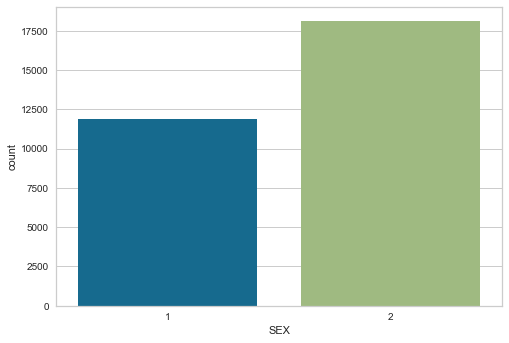

In [13]:
print(Bold+'The unique values of SEX:'+End)
print(data['SEX'].unique().tolist())
print(Bold + 'The number of 1-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['SEX'][data.SEX==1].value_counts(), 
                100*data['SEX'][data.SEX==1].value_counts()/len(data['SEX'])))
print(Bold + 'The number of 2-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['SEX'][data.SEX==2].value_counts(), 
                100*data['SEX'][data.SEX==2].value_counts()/len(data['SEX'])))
sns.countplot(x='SEX', data=data)
plt.show()

#### Relationship of SEX with the target feature

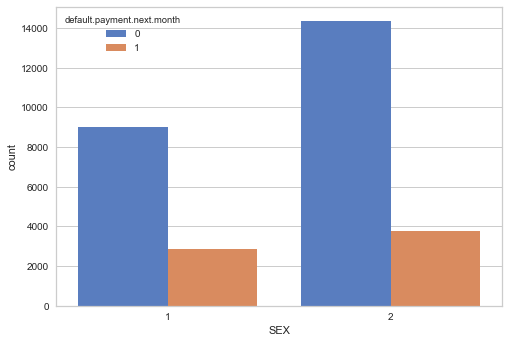

In [14]:
g=sns.countplot(x="SEX", data=data,hue="default.payment.next.month", palette="muted")

$$\textbf{Comments:}$$
Interestingly, even though a number of a non-default female are significantly higher than that of non-default male, a number of a default female are higher than that of the default male.

### EDUCATION

#### Handling abnormal values

The unique values of EDUCATION:
[2, 1, 3, 5, 4, 6, 0]
The number of unique values:
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
The distribution of unique values of EDUCATION:


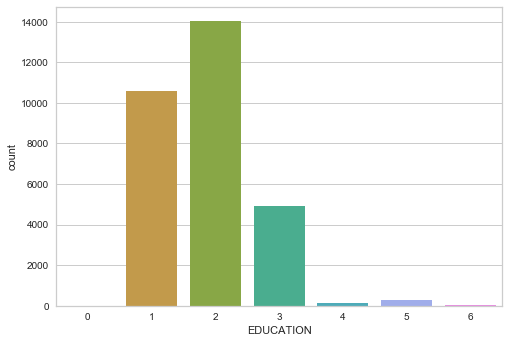

In [15]:
print(Bold+'The unique values of EDUCATION:'+End)
print(data['EDUCATION'].unique().tolist())
print(Bold+'The number of unique values:'+End)
print(data['EDUCATION'].value_counts())
print(Bold+'The distribution of unique values of EDUCATION:'+End)
sns.countplot(x='EDUCATION', data=data)
plt.show()

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown). Let's merge 0, 5, and 6 into the category of 4 as follows.

In [16]:
data['EDUCATION']=data['EDUCATION'].replace([0,5,6],4)
print(Bold+'The unique values of EDUCATION:'+End)
print(data['EDUCATION'].unique().tolist())

The unique values of EDUCATION:
[2, 1, 3, 4]


The number of 1-valued variables:10585 (35.28 %) 
The number of 2-valued variables:14030 (46.77 %) 
The number of 3-valued variables:4917 (16.39 %) 
The number of 4-valued variables:468 (1.56 %) 


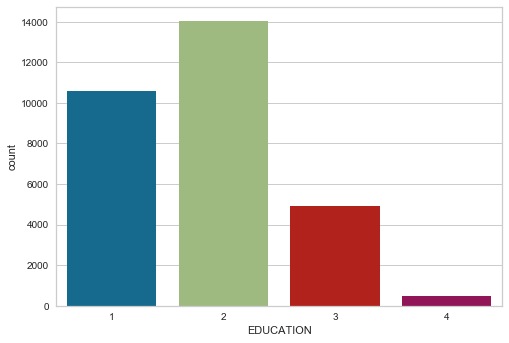

In [17]:
print(Bold + 'The number of 1-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['EDUCATION'][data.EDUCATION==1].value_counts(), 
                100*data['EDUCATION'][data.EDUCATION==1].value_counts()/len(data['EDUCATION'])))
print(Bold + 'The number of 2-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['EDUCATION'][data.EDUCATION==2].value_counts(), 
                100*data['EDUCATION'][data.EDUCATION==2].value_counts()/len(data['EDUCATION'])))
print(Bold + 'The number of 3-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['EDUCATION'][data.EDUCATION==3].value_counts(), 
                100*data['EDUCATION'][data.EDUCATION==3].value_counts()/len(data['EDUCATION'])))
print(Bold + 'The number of 4-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['EDUCATION'][data.EDUCATION==4].value_counts(), 
                100*data['EDUCATION'][data.EDUCATION==4].value_counts()/len(data['EDUCATION'])))
sns.countplot(x='EDUCATION', data=data)
plt.show()

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

The majority of the client using the credit cards are undergraduate students, followed by graduate students. The third-largest client group is high school students.

#### Relationship of EDUCATION with the target feature

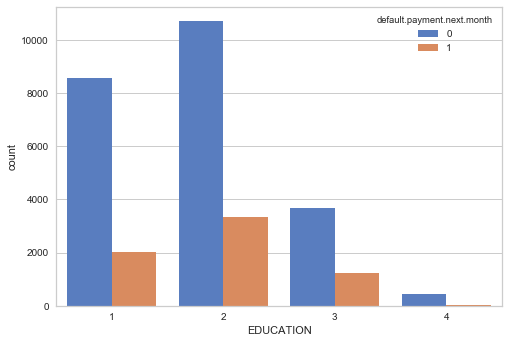

In [18]:
g=sns.countplot(x='EDUCATION', data=data,hue="default.payment.next.month", palette="muted")

$$\textbf{Comments:}$$

The client group with the largest default rate is an undergraduate student.

### MARRIAGE

#### Handling abnormal values

The unique values of MARRIAGE:
[1, 2, 3, 0]
The number of unique values:
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
The distribution of unique values of MARRIAGE:


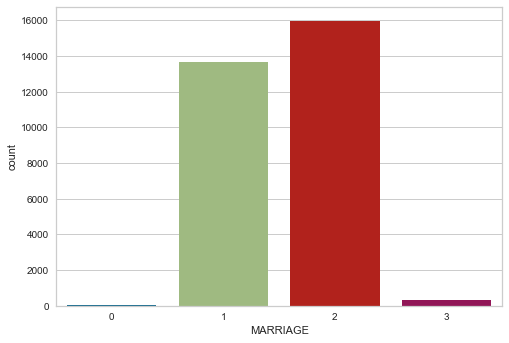

In [19]:
print(Bold+'The unique values of MARRIAGE:'+End)
print(data['MARRIAGE'].unique().tolist())
print(Bold+'The number of unique values:'+End)
print(data['MARRIAGE'].value_counts())
print(Bold+'The distribution of unique values of MARRIAGE:'+End)
sns.countplot(x='MARRIAGE', data=data)
plt.show()

MARRIAGE: Marital status (1=married, 2=single, 3=others). Let's merge the group of 0 into the group of 3, such as others.

The unique values of MARRIAGE:
[1, 2, 3]
The number of unique values:
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64
The number of 1-valued variables:13659 (45.53 %) 
The number of 2-valued variables:15964 (53.21 %) 
The number of 3-valued variables:377 (1.26 %) 


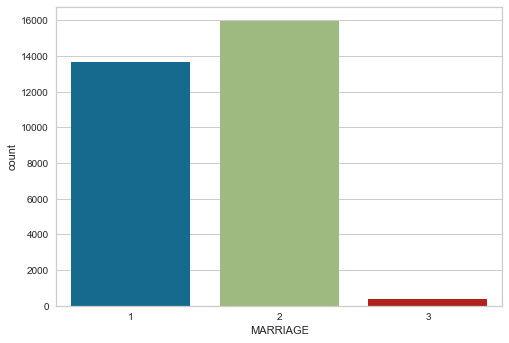

In [20]:
data['MARRIAGE']=data['MARRIAGE'].replace(0,3)
print(Bold+'The unique values of MARRIAGE:'+End)
print(data['MARRIAGE'].unique().tolist())
print(Bold+'The number of unique values:'+End)
print(data['MARRIAGE'].value_counts())

print(Bold + 'The number of 1-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['MARRIAGE'][data.MARRIAGE==1].value_counts(), 
                100*data['MARRIAGE'][data.MARRIAGE==1].value_counts()/len(data['MARRIAGE'])))
print(Bold + 'The number of 2-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['MARRIAGE'][data.MARRIAGE==2].value_counts(), 
                100*data['MARRIAGE'][data.MARRIAGE==2].value_counts()/len(data['MARRIAGE'])))
print(Bold + 'The number of 3-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['MARRIAGE'][data.MARRIAGE==3].value_counts(), 
                100*data['MARRIAGE'][data.MARRIAGE==3].value_counts()/len(data['MARRIAGE'])))
sns.countplot(x='MARRIAGE', data=data)
plt.show()

MARRIAGE: Marital status (1=married, 2=single, 3=others)

The largest client group using the credit cards is the single one, followed by the married group.

#### Relationship of MARRIGAE with the target feature

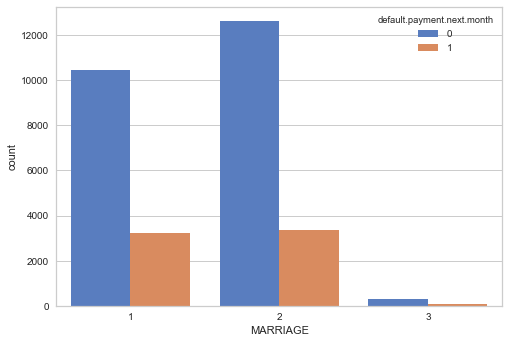

In [21]:
g=sns.countplot(x='MARRIAGE', data=data,hue="default.payment.next.month", palette="muted")

## Repayment status variables

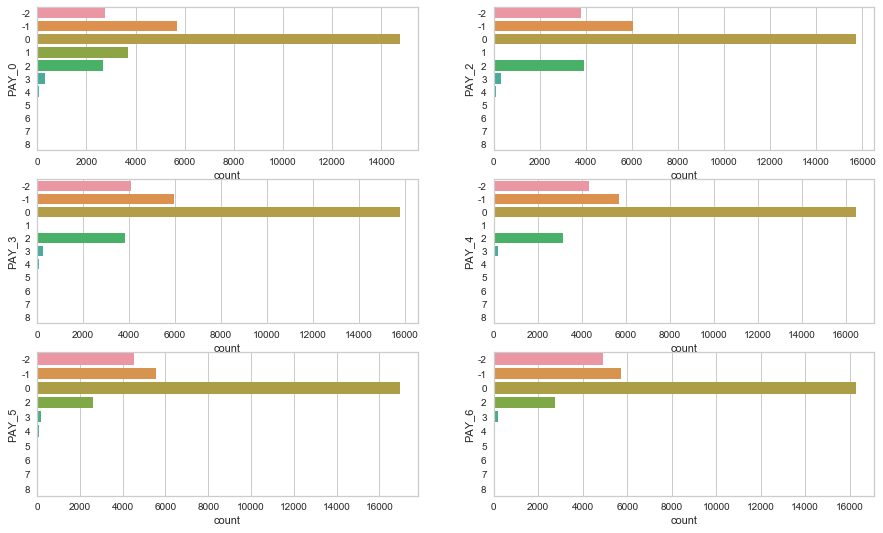

In [22]:
repay_vars=['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15, 9))
for i,col in enumerate(repay_vars):
    plt.subplot(3,2,i+1)
    sns.countplot(y=col,data=data,
              orient='h')

$$\textbf{Comments:}$$

Repayment status in month, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

But, there are two abnormal values of -2 and 0. How to intepret them? Can we replace this abnormal value by 9? I really do not know how to handle these abnormal values of -2 and 0.

## Continuous variables (float64-formated ones)

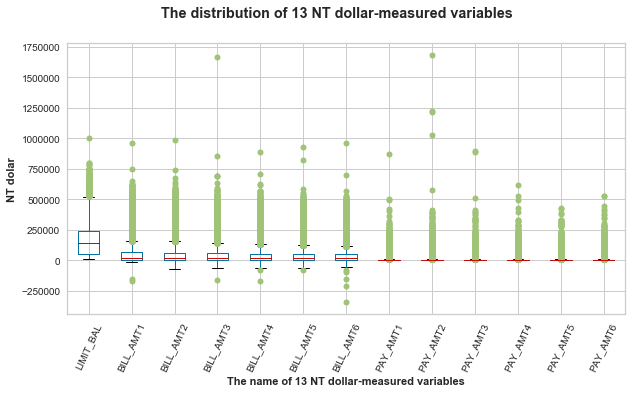

In [25]:
con_vars=data.loc[:,data.dtypes==np.float64].columns.tolist()
boxplot=data.boxplot(column=con_vars,figsize=(10,5),rot=65,sym='go')
plt.suptitle('The distribution of %d NT dollar-measured variables'%len(con_vars)
             ,fontweight='bold')
plt.ylabel('NT dolar',fontweight='bold')
plt.xlabel('The name of %d NT dollar-measured variables'%len(con_vars),fontweight='bold')
plt.show()

 $$\textbf{Comments:}$$
 
 There are big difference in scale among NT Dollar-measured variables. Indeed, We suspect that the differing scales of the raw data may be negatively impacting the skill of
some of the algorithms.

## Relation with label

### Limit_bal

### Correlation among explanatory variables

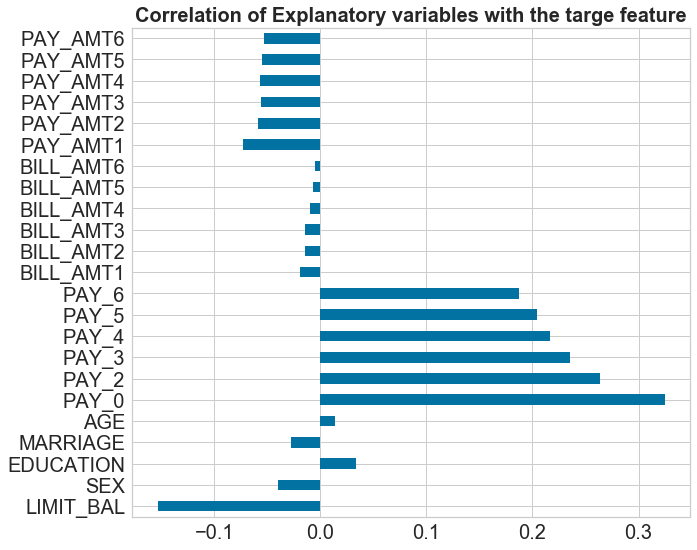

In [26]:
fig=plt.figure(figsize=(10,9))
data[data.columns[1:24]].corrwith(data['default.payment.next.month']).plot.barh(fontsize = 20,
                                                                                rot = 0, grid = True)
plt.title( "Correlation of Explanatory variables with the targe feature",
          fontsize = 20,fontweight='bold')
plt.show()

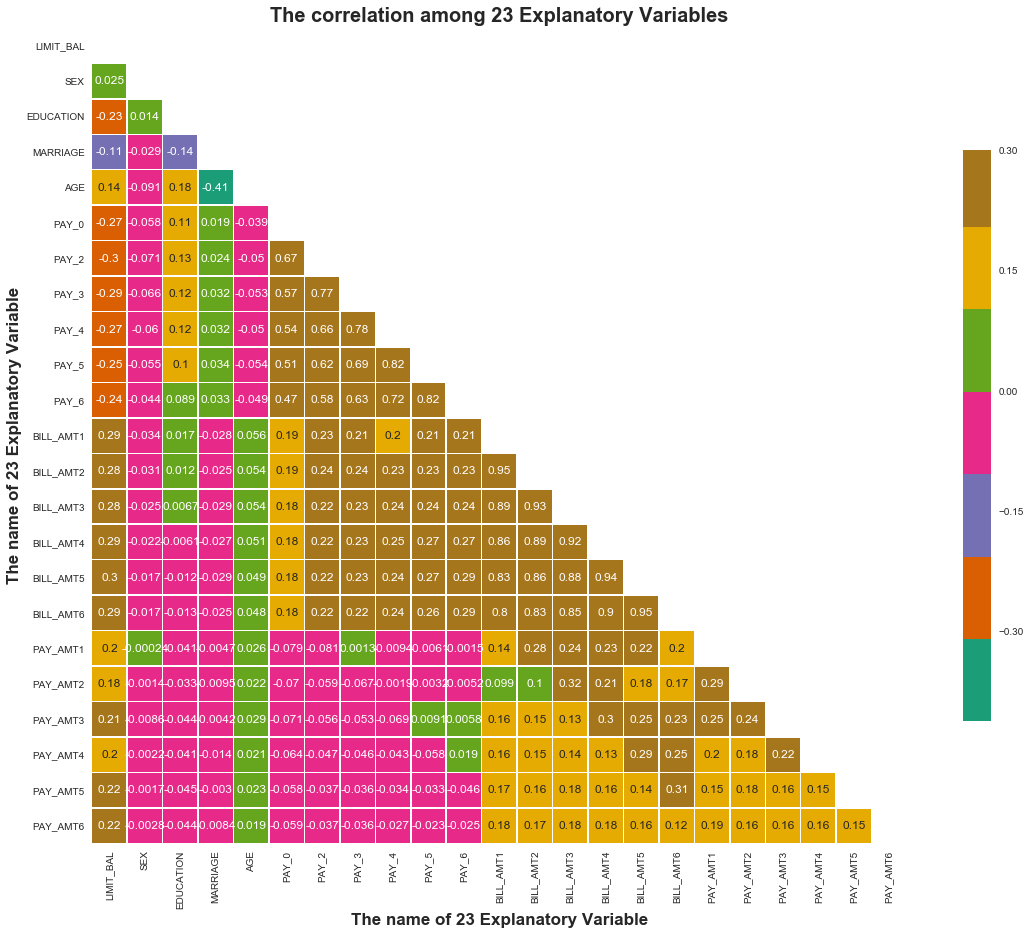

In [27]:
correlations_exvar=data[data.columns[1:24]].corr()
plt.figure(figsize=(20, 15))
mask1 = np.zeros_like(correlations_exvar, dtype=np.bool)
mask1[np.triu_indices_from(mask1)] = True
cmap = 'Dark2'# sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlations_exvar,cmap=cmap, mask=mask1,annot=True,
            square=True
           ,vmax=.3, center=0,
            linewidths=.5, cbar_kws={"shrink": 0.7})
plt.title('The correlation among %d Explanatory Variables'% len(data[data.columns[1:24]].columns),
          fontsize=20, fontweight='bold')
plt.ylabel('The name of %d Explanatory Variable'%len(data[data.columns[1:24]].columns),
          fontsize=17, fontweight='bold')
plt.xlabel('The name of %d Explanatory Variable'%len(data[data.columns[1:24]].columns),
          fontsize=17, fontweight='bold')
plt.show()

### Correlation with the threshold

In [28]:
def correlation_select(correlation, threshold):
    correlation_up=correlation.where(np.triu(np.ones(correlation.shape), k = 1).astype(np.bool))
    select_corr= [column for column in correlation_up.columns if any(abs(correlation_up[column])>threshold)]
    # printing
    print(Bold+ Red +'------------------------------------------------------------------'+End)
    print(Bold+ f'A pair with with correlation over {threshold}:'+End + '%d'%len(select_corr))
    #print(len(select_corr))
    print(Bold+ Red +'------------------------------------------------------------------'+End)
    print(Bold+f'List of pair with correlation over {threshold}:' + End)
    print(select_corr)
    print(Bold+ Red +'------------------------------------------------------------------'+End)
    record_select_correlation=pd.DataFrame(columns=['Attribute_1','Attribute_2','Correlation_Value'])
    for column in select_corr:
        Attribute_11=list(correlation_up.index[abs(correlation_up[column])>threshold])
        Attribute_21=[column for _ in range(len(Attribute_11))]
        Correlation_Value1=list(correlation_up[column][abs(correlation_up[column])>threshold])
        temp_df_corr=pd.DataFrame.from_dict({'Attribute_1': Attribute_11,
                                      'Attribute_2': Attribute_21,
                                      'Correlation_Value': Correlation_Value1})
        record_select_correlation=record_select_correlation.append(temp_df_corr,ignore_index=True)
    print(Bold+f'All pairs with correlation over {threshold}:')
    print(Bold+ Red +'------------------------------------------------------------------'+End)
    return record_select_correlation;

In [29]:
record_select_correlation=correlation_select(correlation=correlations_exvar, threshold=0.5)
print(record_select_correlation)

------------------------------------------------------------------
A pair with with correlation over 0.5:10
------------------------------------------------------------------
List of pair with correlation over 0.5:
['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
------------------------------------------------------------------
All pairs with correlation over 0.5:
------------------------------------------------------------------
   Attribute_1 Attribute_2  Correlation_Value
0        PAY_0       PAY_2           0.672164
1        PAY_0       PAY_3           0.574245
2        PAY_2       PAY_3           0.766552
3        PAY_0       PAY_4           0.538841
4        PAY_2       PAY_4           0.662067
5        PAY_3       PAY_4           0.777359
6        PAY_0       PAY_5           0.509426
7        PAY_2       PAY_5           0.622780
8        PAY_3       PAY_5           0.686775
9        PAY_4       PAY_5           0.8198

## The target feature

In [30]:
y=data['default.payment.next.month']#.values
y[0:4]

0    1
1    1
2    0
3    0
Name: default.payment.next.month, dtype: int64

The unique values of SEX:
[1, 0]
The number of 1-valued variables:6636 (22.12 %) 
The number of 2-valued variables:23364 (77.88 %) 


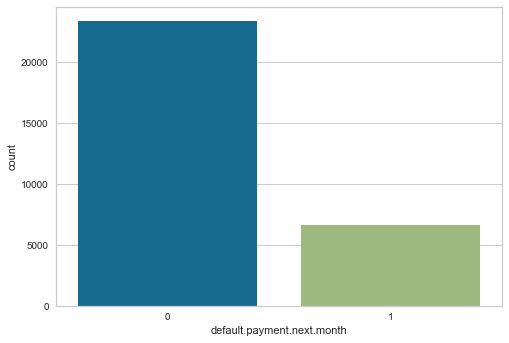

In [31]:
print(Bold+'The unique values of SEX:'+End)
print(data['default.payment.next.month'].unique().tolist())
print(Bold + 'The number of 1-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['default.payment.next.month'][data['default.payment.next.month']==1].value_counts(), 
                100*data['default.payment.next.month'][data['default.payment.next.month']==1].value_counts()/len(data['default.payment.next.month'])))
print(Bold + 'The number of 2-valued variables:'+ End 
      +'%d (%.2f %%) '%(data['default.payment.next.month'][data['default.payment.next.month']==0].value_counts(), 
                100*data['default.payment.next.month'][data['default.payment.next.month']==0].value_counts()/len(data['default.payment.next.month'])))
sns.countplot(x='default.payment.next.month', data=data)
plt.show()

## The explanatory variables

In [32]:
X=data.iloc[:,1:-1]#.values
X.head(2)#[:2]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0


# Preparing data

## Standardizing data

In [33]:
standardized_X = preprocessing.scale(X)
standardized_X[1:5]

array([[-0.3659805 ,  0.81016074,  0.21186989,  0.84913055, -1.02904717,
        -0.87499115,  1.78234817,  0.1388648 ,  0.18874609,  0.23491652,
         1.99231551, -0.65921875, -0.66674657, -0.63925429, -0.62163594,
        -0.60622927, -0.59796638, -0.34194162, -0.21358766, -0.24000461,
        -0.24422965, -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.21186989,  0.84913055, -0.16115646,
         0.01486052,  0.1117361 ,  0.1388648 ,  0.18874609,  0.23491652,
         0.25313738, -0.29855966, -0.49389911, -0.48240819, -0.44973025,
        -0.41718767, -0.39162956, -0.25029158, -0.19188673, -0.24000461,
        -0.24422965, -0.24868274, -0.01212243],
       [-0.90549825,  0.81016074,  0.21186989, -1.06879721,  0.16430256,
         0.01486052,  0.1117361 ,  0.1388648 ,  0.18874609,  0.23491652,
         0.25313738, -0.05749103, -0.01329269,  0.03284648, -0.23237268,
        -0.18672897, -0.15657889, -0.22119058, -0.16936116, -0.22864528,
        -0.23784635, -0.2441

## Converting to Pandas type

In [34]:
standardized_X=pd.DataFrame(data=standardized_X,
                           columns=data[data.columns[1:24]].columns)
standardized_X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.21187,-1.068797,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.21187,0.849131,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.21187,0.849131,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.21187,-1.068797,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.21187,-1.068797,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


## Checking them

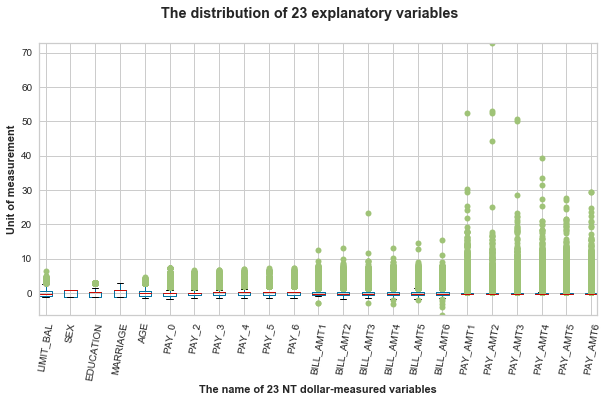

In [35]:
boxplot=standardized_X.boxplot(figsize=(10,5),rot=80,sym='go')
plt.suptitle('The distribution of %d explanatory variables'%len(standardized_X.columns)
             ,fontweight='bold')
plt.ylabel('Unit of measurement',fontweight='bold')
plt.xlabel('The name of %d NT dollar-measured variables'%len(standardized_X.columns),fontweight='bold')
plt.autoscale(enable=True,axis='both',tight=True)
plt.show()

# Model Development and Evaluation




## Defining a model evaluation function

In [39]:
def get_model_evaluation_ver1(estimator,X, y,seed,
                         train_sizes, cv, scoring,n_jobs):
    """
    estimator: 
    X_train,y_train,X_test,y_test
    train_sizes: an array such as [0.1, 0.33, 0.55, 0.78, 1. ]
    cv:
    scoring: string such as 'roc_auc'
    """
    start = timer()
    print(Bold+Red+'The configuration of the Machine Learning model:'+End)
    print(estimator)
    #print(Bold+Red+'I am doing my job. Please wait!'+End)
    #print(Bold+Red+'............'+End)
    print(Bold+Red+'Now, I am training and evaluating model'+End)
    print(Bold+Red+'............'+End)
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=seed)
    # training model
    estimator.fit(X_train,y_train)
    # making predictions
    y_predicted=estimator.predict(X_test)
    prob_predicted=estimator.predict_proba(X_test)
    
    # plotting confusion matrix
    disp = plot_confusion_matrix(estimator, X_test, y_test,
                                 display_labels=None,
                                 cmap='Oranges',
                                 values_format='d',
                                 normalize=None)
    disp.ax_.set_title("Confusion Matrix",fontsize=14,
          fontweight='bold',color='tab:orange')
    plt.grid(False)
    
    # Classification Report
    print(Bold+Red+ '\nClassification Report:' + End)
    print(classification_report(y_test, y_predicted))
    
    # AUROC
    print(Bold+Red+'ROC Score:' + End +'%.2f'%(roc_auc_score(y_test, prob_predicted[:,1])))
    fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_test, y_predicted)
    print(Bold+Red+'Various Thresholds for classification:'+End)
    print(thresholds_valid)
    plt.figure(figsize=(12, 5))
    plt.plot(fpr_valid,tpr_valid,
         label='AUROC (%.2f)'%(roc_auc_score(y_test, prob_predicted[:,1])),
         linestyle='--')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='-')
    plt.autoscale(enable=True, axis='both',tight=True)
    plt.suptitle('AUROC of ' + str(estimator).split('(')[0],
          fontsize=15,fontweight='bold',color='b')
    plt.ylabel('Recall \n Sensitivity \nTrue Positive Rate', fontsize=12,color='b',fontweight='bold')
    plt.xlabel('False Positive Rate',fontsize=12,color='b',fontweight='bold')
    plt.legend(loc="lower right")

    
    # Learning Curve
    print(Bold+Red+'Now, I am computing the learning curve'+End)
    print(Bold+Red+'............'+End)
    train_sizes, train_scores, test_scores = learning_curve(estimator,
                                                            X,y, train_sizes=train_sizes,
                                                            cv=cv, scoring=scoring,
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.figure(figsize=(12, 5))
    plt.title("Learning Curve Of " + str(estimator).split('(')[0],
         fontsize=14,fontweight='bold',color='b')
    plt.plot(train_sizes, train_scores_mean, marker='o', color="blue",
             label="Training score", linestyle='--')
    plt.plot(train_sizes, test_scores_mean, marker='v', color="green",
             label="Valid score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.autoscale(enable=True, axis='both',tight=True)
    plt.grid(which='major',linestyle=':',linewidth=0.9) 
    plt.ylabel(scoring,fontsize=12)
    plt.xlabel('Train size',
           fontsize=12,
           fontweight='normal',color='k')
    plt.legend(loc="best")
    print(Bold+Red+'I am done in %.2f mins' %((timer() - start)/60)+End)
    return estimator,train_sizes, train_scores, test_scores

## No Pipeline

The configuration of the Machine Learning model:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Now, I am training and evaluating model
............

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.56      0.68      4710
           1       0.30      0.70      0.42      1290

    accuracy                           0.59      6000
   macro avg       0.59      0.63      0.55      6000
weighted avg       0.75      0.59      0.62      6000

ROC Score:0.71
Various Thresholds for classification:
[2 1 0]
Now, I am computing the learning curve
............
I am done in 0.54 mins


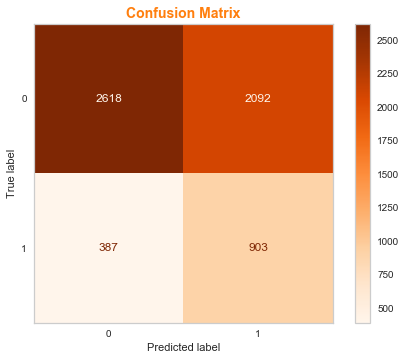

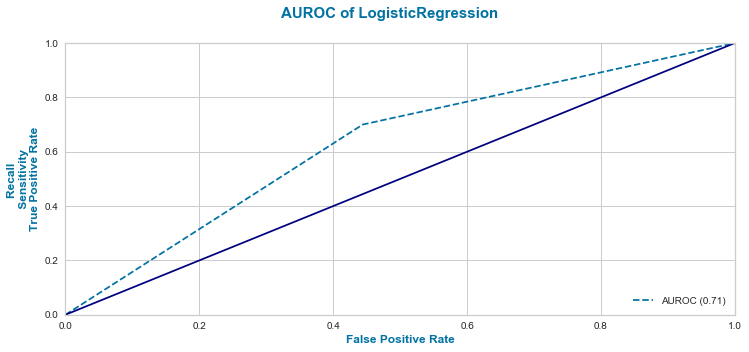

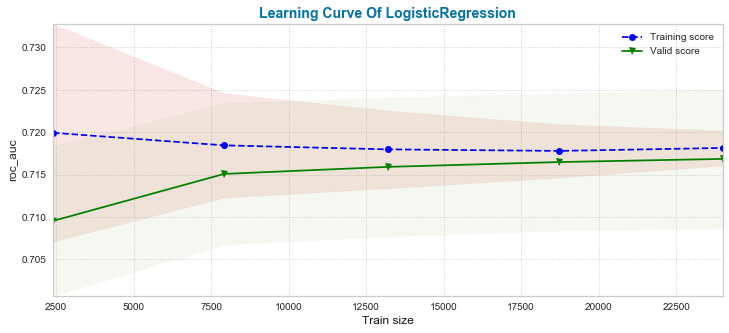

In [44]:
seed=7
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=seed)
train_sizes=[0.1, 0.33, 0.55, 0.78, 1. ]
scoring='roc_auc'
LR_default=LogisticRegression(solver='liblinear',penalty='l1',fit_intercept=False)

scalerlr_eval,train_sizes_eval, scalerlr_train_scores_eval, scalerlr_test_scores_eval=get_model_evaluation_ver1(LR_default,
                                                                                              standardized_X,
                                                                                              y,seed,
                                                                                              train_sizes, 
                                                                                              cv, scoring,
                                                                                              n_jobs=4)

## Pipelines
We suspect that the differing distributions of the raw data may be negatively impacting the skill of some of the algorithms. Let's evaluate the same algorithms with a standardized copy of the dataset. This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of one. We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

The configuration of the Machine Learning model:
Pipeline(memory=None,
         steps=[('Standardized',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ScaledLogit',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=False, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
Now, I am training and evaluating model
............

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.56      0.68      4710
           1       0.30      0.69      0.42      1290

    accuracy                    

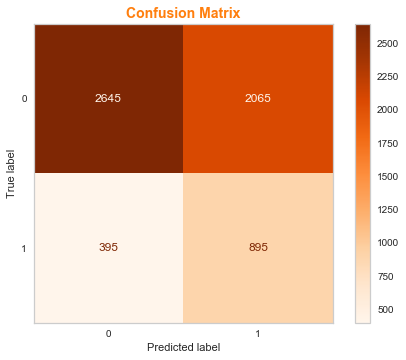

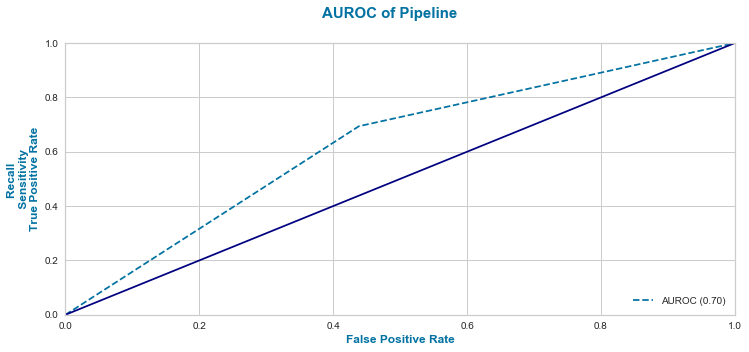

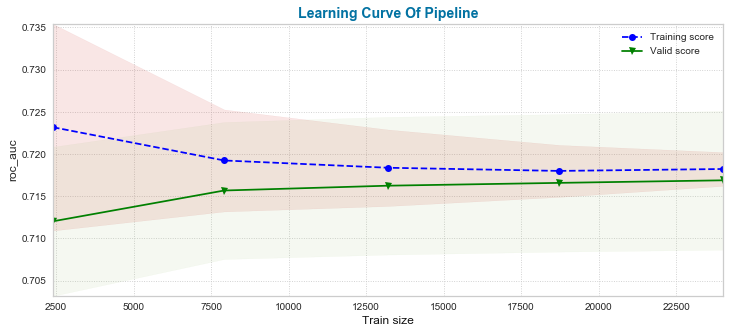

In [42]:
LR_Pipe=Pipeline([ ('Standardized', StandardScaler()),
              ('ScaledLogit',LR_default)])
pipelr_eval,train_sizes_eval, pipelr_train_scores_eval, pipelr_test_scores_eval=get_model_evaluation_ver1(LR_Pipe,
                                                                                              X,
                                                                                              y,seed,
                                                                                              train_sizes, 
                                                                                              cv, scoring,
                                                                                              n_jobs=4)

$$\textbf{Comments:}$$

The results suggest digging deeper into the KNN algorithm. It is very likely that configuration beyond the default may yield even more accurate models.